In [1]:
import geopandas as gpd

streetcar_delay_file = gpd.read_file('./delays/streetcar_delay_2025.csv')

In [ ]:
# get all the station names
stations_list = streetcar_delay_file['Station'].values

unique_stations = list(set(list(stations_list)))

In [ ]:
streetcar_points = []

# This is the code to run! this cell will take maybe 30 minutes (or it does on my computer)

for i in range(len(unique_stations)):
    x = gpd.tools.geocode(stations_list[i]+", Toronto, Ontario")
    streetcar_points.append(x)


In [ ]:


# for i in range(20, 50):
#     x = gpd.tools.geocode(stations_list[i]+", Toronto, Ontario")
#     streetcar_points.append(x)

In [44]:
toronto_ct = gpd.read_file('Toronto_Census_Tracts_No_Centroid_Final.shp')


EPSG:4326


<Axes: >

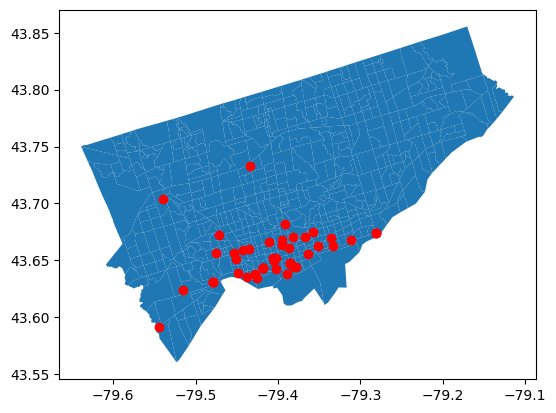

In [ ]:
from matplotlib import pyplot as plt
from shapely import Point

fig, ax = plt.subplots()

toronto_ct.plot(ax=ax)
toronto_ct = toronto_ct.to_crs('4326')

# this is to get all the points to a list and then display it
points = []
for i in range(len(streetcar_points)):
    try:
        point = streetcar_points[i].geometry[0]
        points.append(point)

    except:
        print('doesnt work for index ', i)

print(toronto_ct.crs)
streetcar_stops = gpd.GeoDataFrame(geometry = points, crs=toronto_ct.crs)
streetcar_stops.plot(ax=ax, color = 'red')

streetcar_stops.to_file('Streetcar_Delay_Points.shp')

In [ ]:
# Get raw bus data
bus_2025_file = gpd.read_file('./delays/bus_delay_2025.csv')

In [ ]:
# subset to only what is needed
bus_2025_gdf = bus_2025_file[['_id', 'Date', 'Station', 'Min Delay']]

Index(['_id', 'Date', 'Line', 'Time', 'Day', 'Station', 'Code', 'Min Delay',
       'Min Gap', 'Bound', 'Vehicle'],
      dtype='object')


In [ ]:
# get rid of all zeroes
bus_2025_gdf_no_zeroes = bus_2025_gdf[bus_2025_gdf['Min Delay'] != '0']

# get rid of anything before september
bus_2025_gdf_no_zeroes_september = bus_2025_gdf_no_zeroes[bus_2025_gdf_no_zeroes['Date'] > '2025-09']

# how many are left?
print(len(bus_2025_gdf_no_zeroes_september['_id'].values))

# get the list of unique names
unique_stops = list(set(list(bus_2025_gdf_no_zeroes_september['Station'].values)))

stop_name_to_delay_count = {}

for i in range(len(unique_stops)):
    # get number of occurences of this name in delay file
    only_this_stop = bus_2025_gdf_no_zeroes_september[bus_2025_gdf_no_zeroes_september['Station'] == unique_stops[i]]
    # add this count to the gdf
    stop_name_to_delay_count[unique_stops[i]] = only_this_stop.shape[0]

from pandas import DataFrame

# simplify the data structure
stop_name_delay_count_df = DataFrame({'Station': stop_name_to_delay_count.keys, 'delay_count': stop_name_to_delay_count.values()})




['20' '0' '0']
4710


TypeError: 'DataFrame' object is not callable

In [ ]:
bus_stop_delay_final_df = bus_2025_gdf_no_zeroes_september.merge(stop_name_delay_count_df, on = 'Station', how = 'left')
bus_stop_delay_final_df.to_csv('bus_delay_station_count_2025.csv')


        _id                 Date                 Station Min Delay  \
0     40886  2025-09-01T00:00:00     YONGE AND ST. CLAIR         5   
1     40887  2025-09-01T00:00:00       BLOOR AND SPADINA        15   
2     40891  2025-09-01T00:00:00     EGLINTON AND DUPLEX        15   
3     40893  2025-09-01T00:00:00           KEELE STATION        20   
4     40894  2025-09-01T00:00:00      STEELES AND CACTUS        10   
...     ...                  ...                     ...       ...   
4705  46287  2025-09-30T00:00:00     NUGGET AND SHORTING        21   
4706  46288  2025-09-30T00:00:00  MCCOWAND AND TRAIL RID        30   
4707  46289  2025-09-30T00:00:00      DUNDAS AND PACIFIC        30   
4708  46290  2025-09-30T00:00:00            PAPE STATION        10   
4709  46291  2025-09-30T00:00:00   BLOOR AND CASTLEFRANK        15   

      delay_count  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
4705          NaN  

In [134]:
bus_stops_geocoded = []
for i in range(10):#len(bus_stop_delay_final_df['Station'].values)):
    x = gpd.tools.geocode(bus_stop_delay_final_df['Station'].values[i]+", Toronto, Ontario")

    print("STATION: ", bus_stop_delay_final_df['Station'].values[i], "LOCATED AT ", x.geometry)
    bus_stops_geocoded.append(x)

STATION:  YONGE AND ST. CLAIR LOCATED AT  0    POINT (-79.3945 43.68731)
Name: geometry, dtype: geometry
STATION:  BLOOR AND SPADINA LOCATED AT  0    POINT (-79.38487 43.64779)
Name: geometry, dtype: geometry
STATION:  EGLINTON AND DUPLEX LOCATED AT  0    POINT (-79.40319 43.72118)
Name: geometry, dtype: geometry
STATION:  KEELE STATION LOCATED AT  0    POINT (-79.45958 43.65557)
Name: geometry, dtype: geometry
STATION:  STEELES AND CACTUS LOCATED AT  0    POINT (-79.32552 43.81549)
Name: geometry, dtype: geometry
STATION:  STEELES AND TANGREEN LOCATED AT  0    POINT (-79.34365 43.81352)
Name: geometry, dtype: geometry
STATION:  GREENWIN AND BATHURST LOCATED AT  0    POINT (-79.44522 43.79064)
Name: geometry, dtype: geometry
STATION:  TOLLINGTON AND MARTIN LOCATED AT  0    POINT (-79.5671 43.68701)
Name: geometry, dtype: geometry
STATION:  YORK MILLS STATION LOCATED AT  0    POINT (-79.40572 43.7434)
Name: geometry, dtype: geometry
STATION:  YORKDALE STATION LOCATED AT  0    POINT (-79